<a href="https://colab.research.google.com/github/shubhamcoder260/ml_projects/blob/main/Breast_Cancer_Dtetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING PACKAGES AND MODULES**

In [ ]:
import pandas as pd #pandas for data handelling
import numpy as np #numpy for numerical stuff
import sklearn #sklearn for models
from sklearn.linear_model import LogisticRegression #logistic regression model
from sklearn.model_selection import train_test_split as tts #splitting the data into training and testing for more accuracy
from sklearn.impute import SimpleImputer #impiuteer for filling or imputin g missing values into the dataset
from sklearn.preprocessing import StandardScaler #standard scaler for scaling the data
import plotly.express as px #for ploting
import matplotlib#for ploting
import matplotlib.pyplot as plt#for ploting
import seaborn as sns#for ploting

**READING THE DAtA**

In [ ]:
data_df=pd.read_csv('Breast_Cancer.csv')
data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


information about the data

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**DATA PREPROCESSING**

Splitting into features(x)and labels(y)

In [ ]:
# converting the diagnosis column into numeric values
#
diag_numeric={'M':1,'B':0}
# #mapping the numeric diagnosis to actual diagnosis
# data_df['diagnosis']=data_df['diagnosis'].map(diag_numeric)
data_df['diagnosis']

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [ ]:
#splitting the diagnosis column as target and all the others as inputs
x = data_df.drop('diagnosis', axis = 1)
y = data_df['diagnosis']
input_cols=list(x.columns)[1:-1]
target_cols='diagnosis'

x=inputs
y=targets

In [ ]:
#splitting the data into testing and training
#x_train and x_test are input data (without diagnosis column) and y_train,test is target data(diagnosis column)
x_train_df,x_test_df,y_train_df,y_test_df=tts(x,y,)

x_train_df
x_test_df
y_train_df
y_test_df

,diagnosis
219,M
319,B
544,B
221,B
489,M
...,...
141,M
255,M
554,B
440,B


**VISUALIZATION OF DATA**

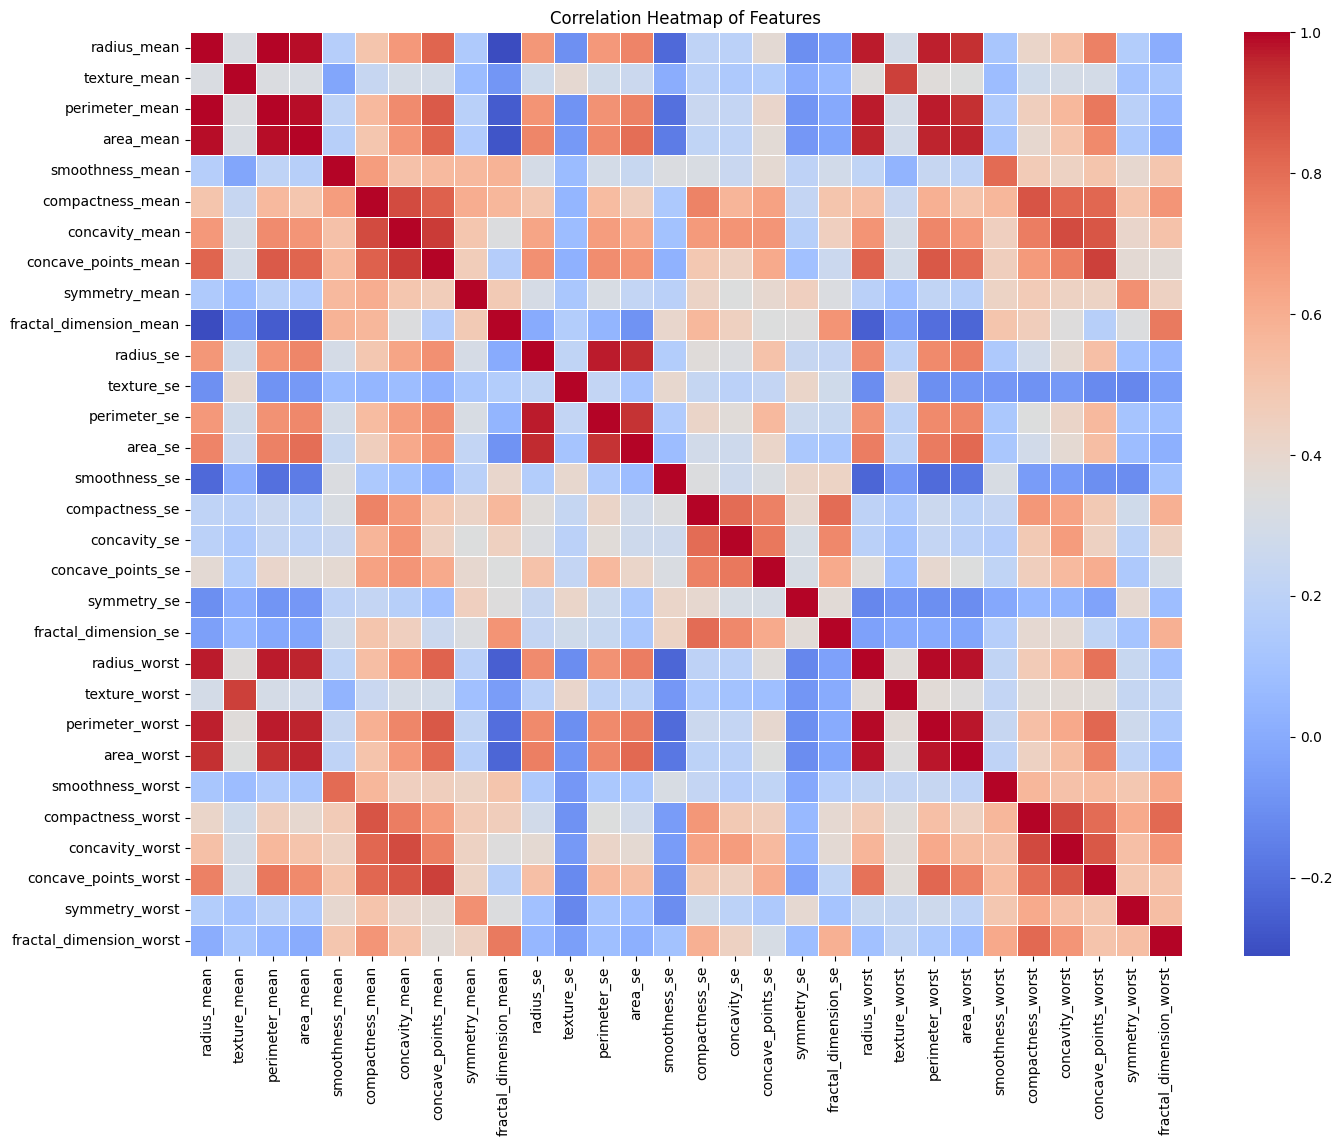

In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = data_df.iloc[:, 2:].corr()  # Exclude 'id' and 'diagnosis'
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
fig1=px.histogram(data_frame=data_df,x='diagnosis',color='diagnosis')
fig1.show()
fig2=px.histogram(data_df,x='area_mean',title='area_meanvs diagnosis',color='diagnosis',nbins=50)
fig2.show()
fig3=px.scatter(data_df,x='perimeter_mean',y='area_mean',color='diagnosis')
fig3.show()
fig4=px.scatter(data_df,x='radius_mean',y='smoothness_mean',color='diagnosis')
fig4.show()
fig5=px.histogram(data_df,x='smoothness_mean',title='smoothness_mean vs diagnosis',color='diagnosis',nbins=50)
fig5.show()


IMPUTING

In [ ]:
imputer=SimpleImputer(strategy='mean') #imputer for imputing a/c to mean values
imputer2=SimpleImputer(strategy='median') #imputer2 for imputing a/c to median value
imputer3=SimpleImputer(strategy='most_frequent') #imputer3 for importing a/c to most frequent value

In [ ]:
imputer.fit(x_train_df)
imputer.fit(x_test_df)
# print(x_train_df.isnull().sum())
x_train_imputed=imputer.transform(x_train_df)#transforming the original dataset with imputed dataset
x_test_imputed=imputer.transform(x_test_df)#transforming the original dataset with imputed dataset


SCALING

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train_df)
scaler.fit(x_test_df)
x_train_scaled=scaler.transform(x_train_imputed)
x_test_scaled=scaler.transform(x_test_imputed)
x_train_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.21121673, -0.11385586, -0.53026928, ...,  0.73795354,
         1.2020304 ,  0.98764251],
       [-0.27218455, -0.41358802, -0.74297492, ..., -0.27102038,
         1.06987859, -0.19975755],
       [-0.27206583, -0.844453  , -0.95146856, ..., -0.35148683,
        -0.37400228, -0.34818256],
       ...,
       [-0.27195453, -0.80074206, -0.50078533, ..., -1.19166978,
        -0.26469153, -0.82083695],
       [-0.27174773,  2.09042439,  1.18822379, ...,  2.13354362,
         0.05834623,  0.64323885],
       [-0.21045279, -0.19815553,  0.50377496, ..., -0.88882045,
        -0.72967011, -0.72524932]])

In [ ]:
x_test_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.632441e+07,14.224664,19.447902,92.602867,658.634965,0.095783,0.105601,0.092523,0.049669,0.181351,...,16.487406,25.870559,108.98972,901.880420,0.132591,0.267140,0.294348,0.118445,0.289324,0.085339
std,1.307194e+08,3.214117,4.765036,21.974672,311.611823,0.015017,0.055269,0.078921,0.034732,0.029188,...,4.665257,6.845699,32.23995,553.213175,0.025621,0.180494,0.225726,0.063853,0.061509,0.020892
min,8.915000e+03,8.196000,10.380000,51.710000,201.900000,0.064290,0.026750,0.000000,0.000000,0.116700,...,8.964000,14.200000,57.26000,242.200000,0.084090,0.046190,0.000000,0.000000,0.178300,0.056950
25%,8.730970e+05,12.085000,15.765000,77.605000,448.050000,0.083700,0.063320,0.031605,0.021390,0.161900,...,13.270000,20.085000,85.00500,530.450000,0.114100,0.141150,0.121800,0.063155,0.248100,0.071050
50%,9.111500e+05,13.740000,18.520000,88.370000,582.700000,0.094400,0.095800,0.065050,0.037800,0.177900,...,15.480000,25.220000,102.50000,739.300000,0.131600,0.216400,0.253500,0.108700,0.280600,0.080220
75%,9.011115e+06,16.120000,22.105000,104.500000,799.400000,0.104450,0.130750,0.134450,0.078275,0.196400,...,19.375000,30.780000,127.20000,1119.000000,0.148150,0.357300,0.400200,0.165250,0.313000,0.093985
max,9.113205e+08,23.290000,33.810000,158.900000,1685.000000,0.163400,0.277600,0.410800,0.162000,0.304000,...,31.010000,49.540000,206.00000,3143.000000,0.218400,0.937900,1.170000,0.273300,0.516600,0.144600


In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train_scaled,y_train_df)
model.predict(x_test_scaled)

array(['M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B'],
      dtype=object)

In [ ]:
#creating a model using logistic regression
model2=LogisticRegression(max_iter=1000)
#fitting the data into the model {model.fit(input_data,target_data)}
model2.fit(x_train_scaled,y_train_df)

model2.predict(x_train_scaled)

#MODEL READY

array(['M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B

SCORE OF MODEL

<Axes: xlabel='weights', ylabel='features'>

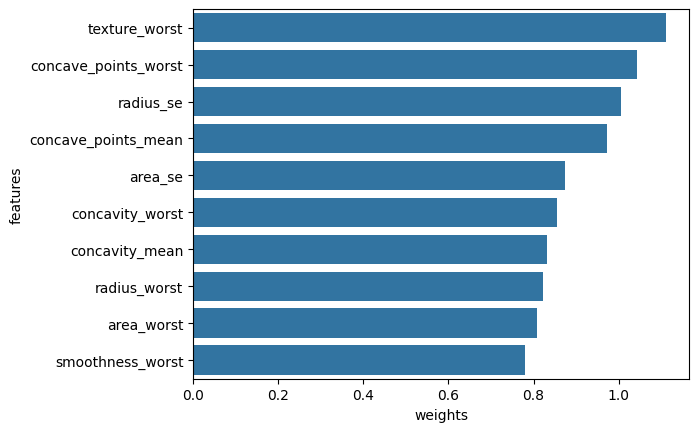

In [ ]:
#This barplot is very essential as it helps to know which feature has most weight on the label

x=list(x)
weight_df=pd.DataFrame({
    'features':(x),
    'weights':model2.coef_.tolist()[0]
})
sns.barplot(data=weight_df.sort_values('weights',ascending=False).head(10),x='weights',y='features')

In [ ]:
train_preds2=model2.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df,train_preds2)

0.9790209790209791

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_df,train_preds2)

array([[86,  0],
       [ 3, 54]])

confusion matrics show that our model has very less false positive and false negative and high true negatives and true positives

In [ ]:
def random_guess_model(inputs):
  return np.random.choice(['M','B'],len(inputs))

accuracy_score(y_test_df,random_guess_model(x_test_scaled))

0.5524475524475524

In [ ]:
sample_data = {
    "id": 100,
    "radius_mean": 14.27,
    "texture_mean": 19.49,
    "perimeter_mean": 92.47,
    "area_mean": 567.7,
    "smoothness_mean": 0.08902,
    "compactness_mean": 0.07587,
    "concavity_mean": 0.05904,
    "concave_points_mean": 0.02315,
    "symmetry_mean": 0.1812,
    "fractal_dimension_mean": 0.06257,
    "radius_se": 0.5435,
    "texture_se": 1.123,
    "perimeter_se": 3.494,
    "area_se": 26.24,
    "smoothness_se": 0.003389,
    "compactness_se": 0.02177,
    "concavity_se": 0.02939,
    "concave_points_se": 0.004556,
    "symmetry_se": 0.01806,
    "fractal_dimension_se": 0.002205,
    "radius_worst": 15.75,
    "texture_worst": 23.41,
    "perimeter_worst": 98.88,
    "area_worst": 648.0,
    "smoothness_worst": 0.1214,
    "compactness_worst": 0.1816,
    "concavity_worst": 0.1512,
    "concave_points_worst": 0.05452,
    "symmetry_worst": 0.3033,
    "fractal_dimension_worst": 0.07231
}



In [ ]:
sample_data=pd.DataFrame(sample_data,index=[0])
model.predict(sample_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array(['M'], dtype=object)